---
title: "Palmer Modeling 6.2"
author: Karisa Kopecek
date: today
format:
  html:
    embed-resources: true
    echo: true
    code-fold: true
---

# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [35]:
#pip install palmerpenguins

In [36]:
# Code Here
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from plotnine import *

from palmerpenguins import load_penguins
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [37]:
#dummies
df = pd.get_dummies(df, columns=['species', 'island', 'sex'], drop_first=True, dtype=float)
df = df.dropna()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [38]:

#splitting into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['bill_depth_mm'], axis=1),
    df['bill_depth_mm'],
    test_size=0.25,
    random_state=42
)

In [39]:
#4 diff models
models = {
    "Model 1": ['bill_length_mm'],
    "Model 2": ['bill_length_mm', 'flipper_length_mm'],
    "Model 3": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g'],
    "Model 4": df.drop(['bill_depth_mm'], axis=1).columns.tolist()
}

In [40]:
#fit models and get training errors
rows = []
for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)
    y_train_ = model.predict(X_train[Xcols])
    train_rmse = root_mean_squared_error(y_train, y_train_)
    train_r2 = r2_score(y_train, y_train_)
    rows.append({"Model": name, "Train RMSE": train_rmse, "Train R2": train_r2})

train_error = pd.DataFrame(rows)
train_error

,Model,Train RMSE,Train R2
0,Model 1,1.908203,0.057074
1,Model 2,1.549351,0.378376
2,Model 3,1.547310,0.380013
3,Model 4,0.782695,0.841360


In [41]:
#testing errors
rows = []
for name, Xcols in models.items():
    model = LinearRegression().fit(X_train[Xcols], y_train)
    y_test_ = model.predict(X_test[Xcols])
    test_rmse = root_mean_squared_error(y_test, y_test_)
    test_r2 = r2_score(y_test, y_test_)
    rows.append({"Model": name, "Test RMSE": test_rmse, "Test R2": test_r2})

test_error = pd.DataFrame(rows)
test_error

,Model,Test RMSE,Test R2
0,Model 1,1.946328,0.027810
1,Model 2,1.568472,0.368646
2,Model 3,1.557992,0.377055
3,Model 4,0.777395,0.844903


In [42]:
#combining errors into 1 dataframe for plot
df_error = train_error.merge(test_error, on="Model")
df_error

,Model,Train RMSE,Train R2,Test RMSE,Test R2
0,Model 1,1.908203,0.057074,1.946328,0.027810
1,Model 2,1.549351,0.378376,1.568472,0.368646
2,Model 3,1.547310,0.380013,1.557992,0.377055
3,Model 4,0.782695,0.841360,0.777395,0.844903


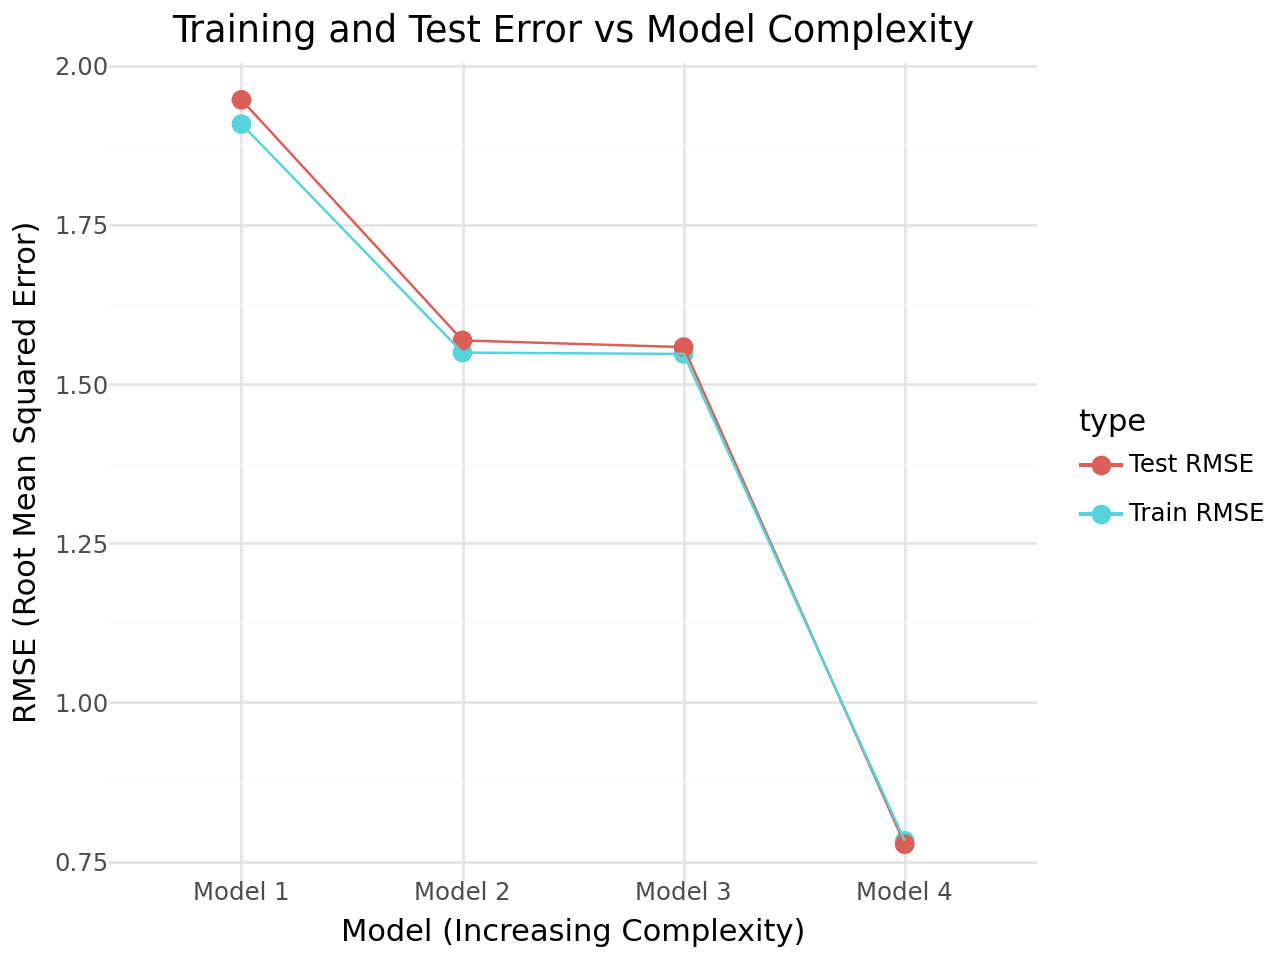

In [43]:
#creating plot of 4 models based on image from notes
df_error_long = df_error[["Model", "Train RMSE", "Test RMSE"]].melt(
    id_vars=["Model"],
    value_name="RMSE",
    var_name="type"
)

(ggplot(df_error_long, aes(x="Model", y="RMSE", color="type")) +
 geom_point(size=3) +
 geom_line(aes(group="type")) +
 labs(title="Training and Test Error vs Model Complexity",
      x="Model (Increasing Complexity)",
      y="RMSE (Root Mean Squared Error)") +
 theme_minimal())

In [44]:
# Which model was best:
best_idx = test_error['Test RMSE'].idxmin()
test_error.loc[best_idx, 'Model']

'Model 4'